<a href="https://colab.research.google.com/github/Pratibhahappy/Project-on-Customer-Conversion-Prediction/blob/main/Project_Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project - Customer Conversion Prediction**

Step 1 - Importing Dataset and Required Dependencies

In [1]:
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**Step 2 - Loading the dataset to a Pandas DataFrame**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/customer_conversion_prediction_data.csv.csv')

**Step 3 - Studying the dataset**

In [4]:
# First 5 rows of the dataset
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
# Last 5 rows of the dataset
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [6]:
# Data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [7]:
# Checking for missing values in each column
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

**Step 4 - Data Cleansing and Preprocessing**

In [8]:
# Encoding Categorical Variables

obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,job,marital,education_qual,call_type,mon,prev_outcome,y
0,management,married,tertiary,unknown,may,unknown,no
1,technician,single,secondary,unknown,may,unknown,no
2,entrepreneur,married,secondary,unknown,may,unknown,no
3,blue-collar,married,unknown,unknown,may,unknown,no
4,unknown,single,unknown,unknown,may,unknown,no


In [9]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['job']= label_encoder.fit_transform(df['job'])
df['marital']= label_encoder.fit_transform(df['marital'])
df['education_qual']= label_encoder.fit_transform(df['education_qual'])
df['call_type']= label_encoder.fit_transform(df['call_type'])
df['mon']= label_encoder.fit_transform(df['mon'])
df['prev_outcome']= label_encoder.fit_transform(df['prev_outcome'])
df['y']= label_encoder.fit_transform(df['y'])

df['job'].unique()
df['marital'].unique()
df['education_qual'].unique()
df['call_type'].unique()
df['mon'].unique()
df['prev_outcome'].unique()
df['y'].unique()


df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,4,1,2,2,5,8,261,1,3,0
1,44,9,2,1,2,5,8,151,1,3,0
2,33,2,1,1,2,5,8,76,1,3,0
3,47,1,1,3,2,5,8,92,1,3,0
4,33,11,2,3,2,5,8,198,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,17,9,977,3,3,1
45207,71,5,0,0,0,17,9,456,2,3,1
45208,72,5,1,1,0,17,9,1127,5,2,1
45209,57,1,1,1,1,17,9,508,4,3,0


In [10]:
# Count of job
df['job'].value_counts()

1     9732
4     9458
9     7597
0     5171
7     4154
5     2264
6     1579
2     1487
10    1303
3     1240
8      938
11     288
Name: job, dtype: int64

In [11]:
# Count of marital
df['marital'].value_counts()

1    27214
2    12790
0     5207
Name: marital, dtype: int64

In [12]:
# Count of education_qual
df['education_qual'].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education_qual, dtype: int64

In [13]:
# Count of call_type
df['call_type'].value_counts()

0    29285
2    13020
1     2906
Name: call_type, dtype: int64

In [14]:
# Count of previous call outcome
df['prev_outcome'].value_counts()

3    36959
0     4901
1     1840
2     1511
Name: prev_outcome, dtype: int64

In [15]:
# Count of subscription outcome
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

**Step 4 - Creation of New Dataset using Sampling Technique**

The dataset is highly unbalanced
 

0 - not subscribed

1 - subcribed

In [16]:
# Seperating the data for analysis
subscribed = df[df.y == 1]
not_subscribed = df[df.y == 0]

In [17]:
print(subscribed.shape)
print(not_subscribed.shape)

(5289, 11)
(39922, 11)


Build a sample dataset containing distribution of Subscribed and Not Subscribed Customers

No of Subscribed Customers - 5289

Taking a random sample of 25000 not subscribed customers

In [18]:
not_subscribed_sample = not_subscribed.sample(n=25000)

Concatenation of two DataFrames

In [19]:
new_dataset = pd.concat([not_subscribed_sample,subscribed],axis=0)

In [20]:
new_dataset.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
16723,38,9,1,1,0,24,5,915,2,3,0
11899,37,1,2,1,2,20,6,8,12,3,0
43137,46,0,1,3,0,24,3,99,2,0,0
35739,56,5,1,1,0,8,8,209,1,3,0
35751,51,4,0,1,0,8,8,498,1,0,0


In [21]:
new_dataset.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45204,73,5,1,1,0,17,9,300,1,0,1
45205,25,9,2,1,0,17,9,386,2,3,1
45206,51,9,1,2,0,17,9,977,3,3,1
45207,71,5,0,0,0,17,9,456,2,3,1
45208,72,5,1,1,0,17,9,1127,5,2,1


In [22]:
new_dataset['y'].value_counts()

0    25000
1     5289
Name: y, dtype: int64

**Step 5 - Splitting the data into Features and Targets for Train Test Split**

In [23]:
X = new_dataset.drop(columns='y', axis=1)
Y = new_dataset['y']

In [24]:
# Split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,  random_state=2)


In [25]:
print(X.shape,x_train.shape,x_test.shape)

(30289, 10) (21202, 10) (9087, 10)


**Step 6 - Model Building and Training**

##### *Model 1 - Logistic Regression*

Feature: 0, Score: -0.00487
Feature: 1, Score: -0.00405
Feature: 2, Score: -0.02526
Feature: 3, Score: 0.14545
Feature: 4, Score: -0.77505
Feature: 5, Score: -0.01560
Feature: 6, Score: -0.02397
Feature: 7, Score: 0.00450
Feature: 8, Score: -0.19527
Feature: 9, Score: -0.20434


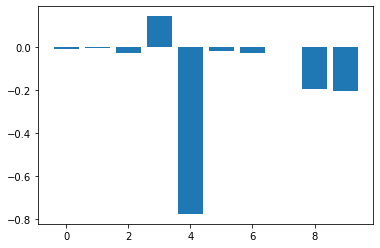

In [26]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from matplotlib import pyplot

# Training logistic regression model
model = LogisticRegression(class_weight={0:0.27,1:0.73},C=20,penalty="l2",fit_intercept=True)
model.fit(x_train , y_train)

# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

As per the Feature Importance taken for the Logistic Regression Model , the important features as shown in the above chart are


1) Job

2) Education_Qual

3) Dur


Let us consider these as the important features and drop the rest of the columns

Splitting the data into Features and Targets after Feature Importance Function

In [27]:
X = new_dataset.drop(columns=['age','marital','call_type','day','mon','num_calls','prev_outcome', 'y'], axis=1)
Y = new_dataset['y']

In [28]:
# Split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,  random_state=2)

In [29]:
print(X.shape,x_train.shape,x_test.shape)

(30289, 3) (21202, 3) (9087, 3)


In [30]:
model = LogisticRegression()

In [31]:
# Training logistic regression model with Training Data
model.fit(x_train , y_train)

LogisticRegression()

In [45]:
# Evaluate the model on the testing set
lr_acc = model.score(x_test, y_test)
lr_acc

0.8482447452404533

AUROC for Logistic Regression

In [33]:
# logistic regression
model1 = model.fit(x_train , y_train)

# fit model
model1.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.8078662255453741


##### *Model* 2 - Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)

# Train the classifier on the training data
classifier_rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [37]:
# Evaluate the model
classifier_rf.oob_score_

0.8448259598151118

AUROC for Random Forest

In [41]:
# random forest
model2 = classifier_rf.fit(x_train, y_train)

# fit model
model2.fit(x_train, y_train)

# predict probabilities
pred_prob2 = model2.predict_proba(x_test)

# roc curve for models
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc score
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score2)

0.8211355591982779


Model 3 - K Neighbour's Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('{:.2f}%'.format(knn.score(x_test, y_test)*100))

82.99%


AUROC for K Neighbour's Classifier

In [49]:
# K Neighbour's Classifier
model3 = knn.fit(x_train, y_train)

# fit model
model3.fit(x_train, y_train)

# predict probabilities
pred_prob3 = model3.predict_proba(x_test)

# roc curve for models
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc score
auc_score3 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score3)

0.8211355591982779


# ***Conclusion***

As the target variable had a huge bias issue, a new dataset was created through undersampling which were trained under three machine learning models Logistic Regression, Random Forest & K-Neighbour's Classifier.


The following are the scores achieved under both the Models

***Logistic Regression***

Model Accuracy Score - 84.82%

AUROC Score - 80.78%


***Random Forest***

Classifier OOB Score - 84.48%

AUROC Score - 82.11%


***K-Neighbour's Classifier***

Classifier KNN Score - 82.11%

AUROC Score - 82.11%


Hence it can be concluded that in terms of performance evaluation of the three models as per the AUROC Score, in this scenario Random Forest & K-Neighbour's Classifier performs better than Logistic Regression.